In [1]:
# Importing Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from collections import Counter

sns.set()

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn import linear_model
from sklearn import ensemble
from sklearn import neighbors
from sklearn import tree
from sklearn import naive_bayes
from sklearn.svm import SVC
import xgboost as xgb

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
# Reading CSV File
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* We have total 9 columns all are Numeric

In [4]:
diabetes_df.shape

(768, 9)

* Toatal number of records are 768 and 9 columns

In [5]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* There are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value with the NAN value then start the imputation process.

In [7]:
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


* As mentioned above that now we will be replacing the zeros with the NAN values so that we can impute it later to maintain the authenticity of the dataset as well as trying to have a better Imputation approach i.e to apply mean values of each column to the null values of the respective columns.

#  Data Visualization

# Univarient Analysis

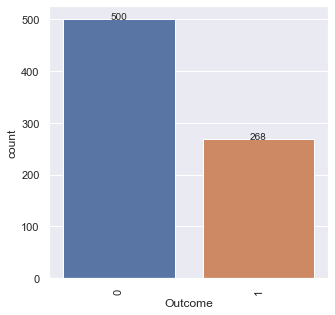

In [8]:
# Lets Display Count on top of countplot
fig, ax1 = plt.subplots(figsize=(5,5))
graph = sns.countplot(ax=ax1,x='Outcome', data=diabetes_df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

* Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

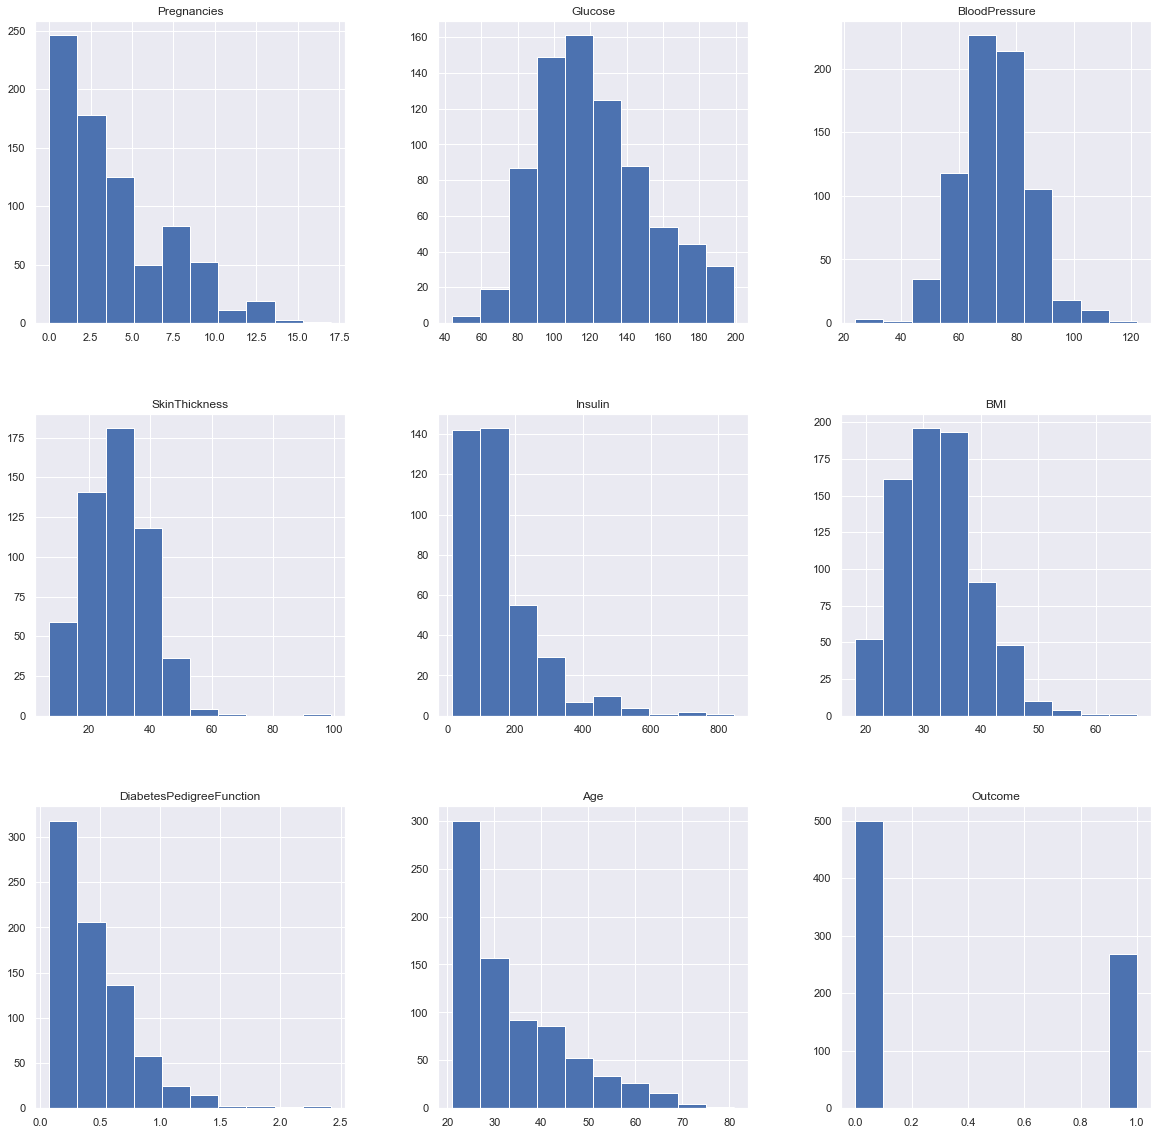

In [9]:
p = diabetes_df.hist(figsize = (20,20))

* From above graph we clearly got that glucoose and blood pressure is kind of Normally Distributed.
* All other columns except outcome are right Skwed.
* Outcome is a  Column has two output 1 and 0

# Bivariate Analysis

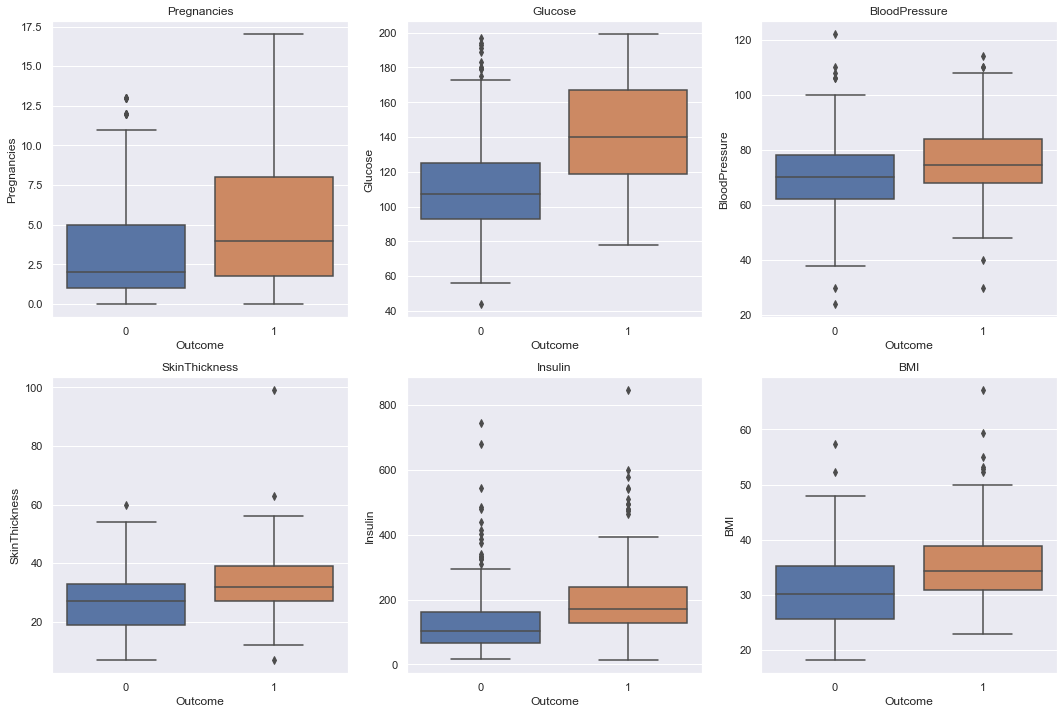

In [10]:
# Box Plot
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(18, 12)
ax = ax.flatten()

features = diabetes_df.columns.tolist()


for axis, feature in zip(ax, features):
    sns.boxplot(data=diabetes_df, x="Outcome", y=feature, ax=axis)
    axis.set_title(feature)

# Multivariate Analysis

Text(0.5, 1.0, 'Co-relation Matrix')

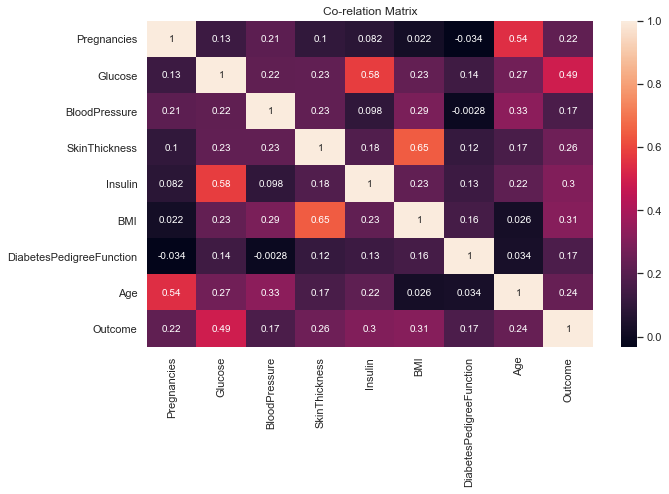

In [11]:
## Co-relation matrix
fig,ax = plt.subplots(figsize = (10,6))
corr = diabetes_df.corr()
sns.heatmap(corr,annot=True)
plt.title("Co-relation Matrix")

Text(0.5, 1.0, ' Pair Plot')

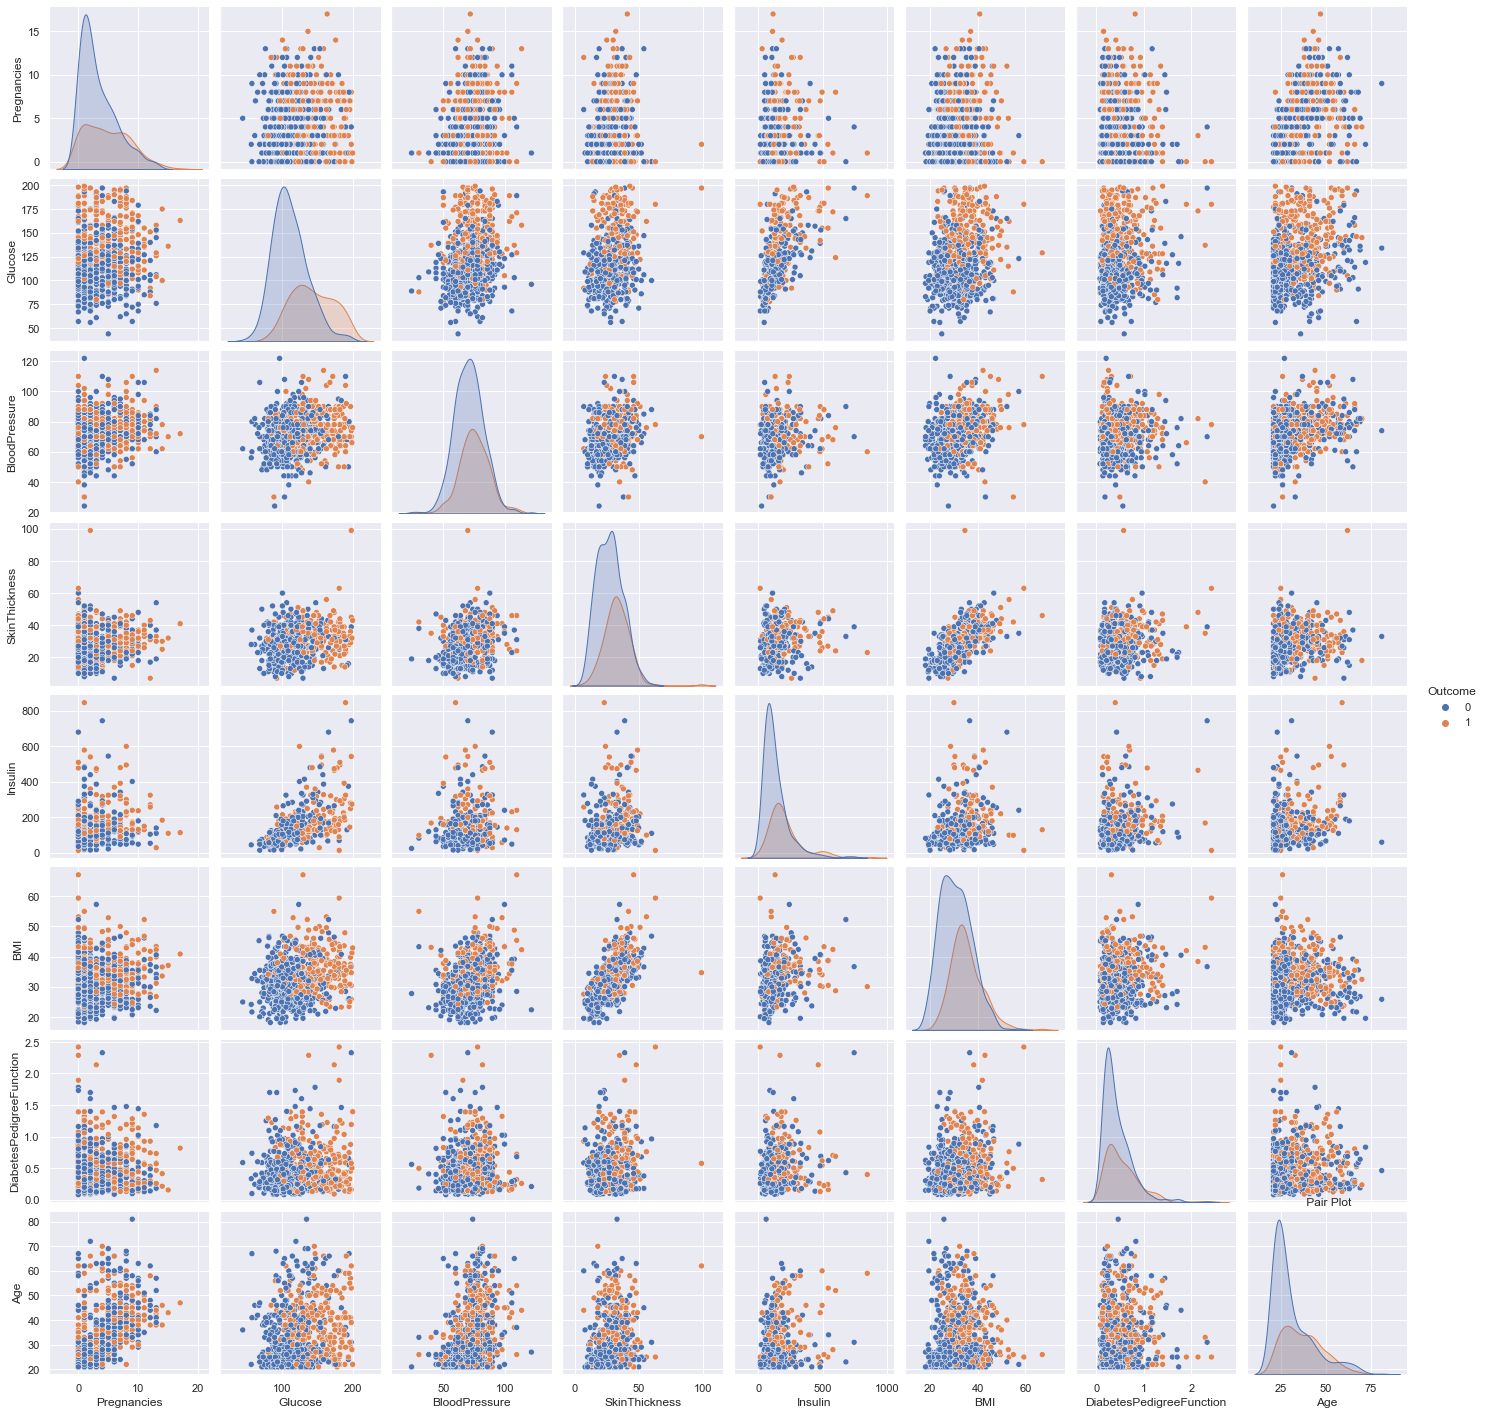

In [12]:
sns.pairplot(diabetes_df,hue="Outcome")
plt.title(" Pair Plot")

# Data Cleaning

In [13]:
# If you use the method sum() along with it, then it will return the total number of the duplicates in the dataset
diabetes_df.duplicated().sum()

0

<AxesSubplot:>

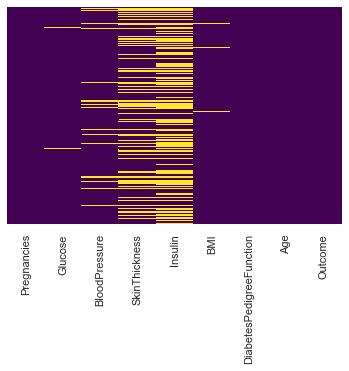

In [14]:
sns.heatmap(diabetes_df.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [15]:
# lets find out the percentage of misssing vale in each column
percent_missing = diabetes_df.isnull().sum() * 100 / len(diabetes_df)
missing_value_df = pd.DataFrame({'column_name': diabetes_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Pregnancies,Pregnancies,0.000000
Glucose,Glucose,0.651042
BloodPressure,BloodPressure,4.557292
SkinThickness,SkinThickness,29.557292
Insulin,Insulin,48.697917
BMI,BMI,1.432292
DiabetesPedigreeFunction,DiabetesPedigreeFunction,0.000000
Age,Age,0.000000
Outcome,Outcome,0.000000


* Glucose,Blood Pressure and BMI has less than 5% of missing value.
* Skin Thickness and Insulin has 29% , 48% missing value.

In [16]:
# Removing Null Values using  meadian
diabetes_df['Glucose'].fillna(diabetes_df['Glucose'].median(), inplace = True)
diabetes_df['BloodPressure'].fillna(diabetes_df['BloodPressure'].median(), inplace = True)
diabetes_df['BMI'].fillna(diabetes_df['BMI'].median(), inplace = True)

* As Insulin has almost 50% missing value so we have drop the column but Insulin one of the important feature in diabetic prediction.
* we replace all values with KNN Imputer.

In [17]:
# Removing Null Values using KNN Imputer
impute_knn = KNNImputer(n_neighbors=2)
new_df = impute_knn.fit_transform(diabetes_df)

In [18]:
new_df

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [19]:
diabetes_df = pd.DataFrame(new_df,columns = diabetes_df.columns)

<AxesSubplot:>

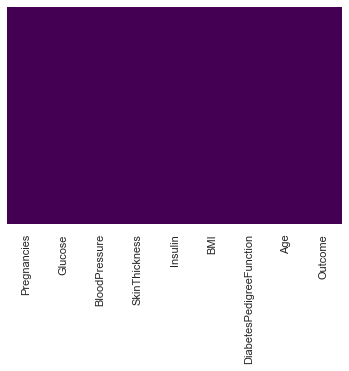

In [20]:
sns.heatmap(diabetes_df.isnull(),yticklabels=False,cbar=False, cmap="viridis")

* We handle all missing Values.

Text(0.5, 1.0, ' Box Plot ')

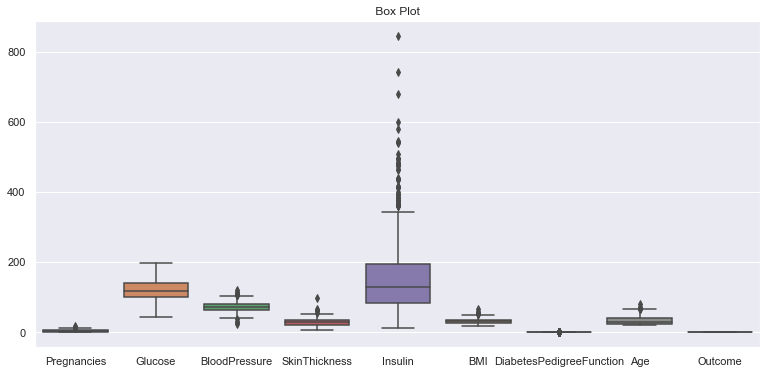

In [21]:
plt.figure(figsize = (13,6))
sns.boxplot(data=diabetes_df,dodge=False)
plt.title(" Box Plot ")

* From above graph we clearly saw that Insulin has large Number of Outliers.

Text(0.5, 1.0, ' Box Plot ')

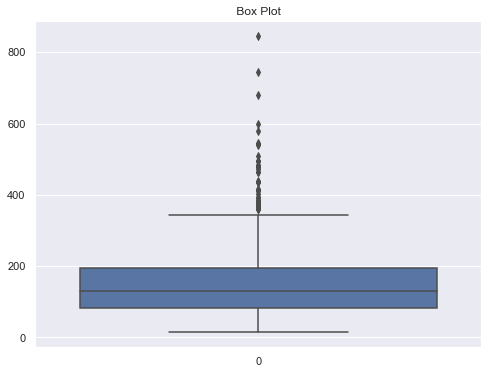

In [22]:
plt.figure(figsize = (8,6))
sns.boxplot(data=diabetes_df['Insulin'],dodge=False)
plt.title(" Box Plot ")


upper_limit :  471.23606752893625
lower_limit :  -160.23085919560296
Mean Value :  155.50260416666666
Median Value :  129.0
1st Standard Deviation :  105.2444877874232


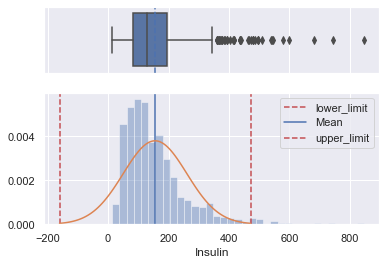

In [23]:
from scipy.stats import norm
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 1)})

median=diabetes_df['Insulin'].median()
mean=diabetes_df['Insulin'].mean()
std = diabetes_df['Insulin'].std()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)

sns.boxplot(diabetes_df['Insulin'], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')


sns.distplot(diabetes_df['Insulin'], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')



plt.legend({'Mean':mean})

ax_box.set(xlabel='')

x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)

plt.show()

In [24]:
#Removing Outlier for Insulin
diabetes_df.drop(diabetes_df[(diabetes_df['Insulin'] > 511.87) | (diabetes_df['Insulin'] < -200.77)].index,inplace = True)

Text(0.5, 1.0, ' Box Plot ')

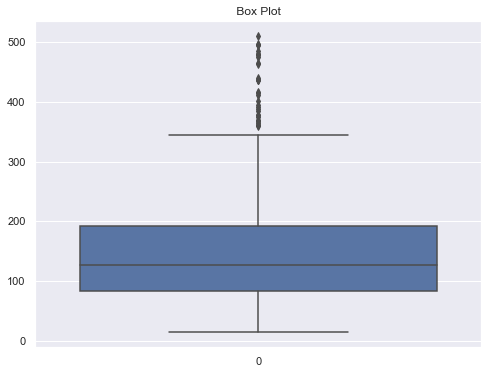

In [25]:
# Boxplot of Insulin After Removing Outliers
plt.figure(figsize = (8,6))
sns.boxplot(data=diabetes_df['Insulin'],dodge=False)
plt.title(" Box Plot ")


# Scaling the Data

Before Standard scaling

In [26]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,113.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,88.5,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,24.0,227.5,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


After Standard scaling

In [27]:
#sc_X = StandardScaler()
#X =  pd.DataFrame(sc_X.fit_transform(diabetes_df.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
#'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
#X.head()

After Scaling

# MinMax Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_arr = scaler.fit_transform(diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
                                            'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']])

In [29]:
diabetes_df = pd.DataFrame(new_arr,columns = diabetes_df.columns)

In [30]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.199597,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.150202,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.184783,0.430444,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.161290,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.310484,0.509202,0.943638,0.200000,1.0


In [31]:
diabetes_df["Outcome"] = diabetes_df["Outcome"].astype('int')

# Splitting the dataset

In [32]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

As, we know that data is imbalanced so we used sampling method

# Oversampling  - SMOTE

In [33]:
from imblearn.over_sampling import SMOTE 
SMOTE = SMOTE()

print('Original dataset shape %s' % Counter(y))

X_res_OS, y_res_OS = SMOTE.fit_resample(X, y)

print('After undersample dataset shape %s' % Counter(y_res_OS))

Original dataset shape Counter({0: 497, 1: 263})
After undersample dataset shape Counter({1: 497, 0: 497})


# spliting data into training and testing

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res_OS,y_res_OS, test_size=0.33,
                                                    random_state=7)

In [35]:
X_train.shape , y_train.shape

((665, 8), (665,))

In [36]:
X_test.shape , y_test.shape

((329, 8), (329,))

# Model Building

In [37]:
model_list={"LogisticRegression score: ": linear_model.LogisticRegression(),
            "svm score: ": svm.SVC(),
            "KNeighborsClassifier score: ": neighbors.KNeighborsClassifier(),
            "DecisionTreeClassifier score: ": tree.DecisionTreeClassifier(),
            "RandomForestClassifier score: ": ensemble.RandomForestClassifier(),
            "GaussianNB score: ": naive_bayes.GaussianNB(),
            "Adda Boost Score:"  : ensemble.AdaBoostClassifier(),
            "Gradient Boosting:"  :ensemble.GradientBoostingClassifier(),
            "XG Boost:" : xgb.XGBClassifier(),
           }

for key,values in model_list.items():
    values.fit(X_train,y_train)
    print(key,values.score(X_test,y_test)*100)

LogisticRegression score:  72.03647416413374
svm score:  78.72340425531915
KNeighborsClassifier score:  78.11550151975683
DecisionTreeClassifier score:  74.46808510638297
RandomForestClassifier score:  78.419452887538
GaussianNB score:  69.90881458966565
Adda Boost Score: 77.50759878419453
Gradient Boosting: 79.93920972644378
[10:21:00] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost: 77.81155015197568


# Hyper Parameter Tunning

* To find the best parameters to increase Accuracy we used Parameter Tunning

# Logistic Regression Model

In [38]:
# Defining Model
logModel = LogisticRegression()
# Parameters
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [39]:
logModel_random = RandomizedSearchCV(estimator = logModel,param_distributions = param_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
logModel_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                         'max_iter': [100, 1000, 2500, 5000],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['lbfgs', 'newton-cg',
                                                    'liblinear', 'sag',
                                                    'saga']}],
                   random_state=35, verbose=2)

In [40]:
print ('Param grid: ', param_grid, '\n')
# print the best parameters
print ('Best Parameters: ', logModel_random.best_params_, ' \n')

Param grid:  [{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'max_iter': [100, 1000, 2500, 5000]}] 

Best Parameters:  {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 1000, 'C': 4.281332398719396}  



In [41]:
logModel_HT = LogisticRegression(solver = 'newton-cg', penalty = 'l2', max_iter = 1000, C =4.281332398719396)
logModel_HT.fit(X_train,y_train)

LogisticRegression(C=4.281332398719396, max_iter=1000, solver='newton-cg')

In [42]:
y_pred = logModel_HT.predict(X_test)

In [43]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("******************************************************************************************")
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred))
print("********************************************************************************************")
print("Classification Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[121  38]
 [ 49 121]]
******************************************************************************************
Accuracy Score:
0.7355623100303952
********************************************************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       159
           1       0.76      0.71      0.74       170

    accuracy                           0.74       329
   macro avg       0.74      0.74      0.74       329
weighted avg       0.74      0.74      0.74       329



# Random Forest

In [44]:
#Random Forest
rf = RandomForestClassifier()

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,
            
'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [45]:
rf_random_ = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random_.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [46]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random_.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}  



In [47]:
rf_random_HT = RandomForestClassifier(n_estimators = 50, min_samples_split = 6, min_samples_leaf = 1, 
                                    max_features = 'auto',max_depth = 110, bootstrap = False)
rf_random_HT.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=110, min_samples_split=6,
                       n_estimators=50)

In [48]:
y_pred = rf_random_HT.predict(X_test)

In [49]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[128  31]
 [ 35 135]]
Accuracy Score:
0.7993920972644377
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       159
           1       0.81      0.79      0.80       170

    accuracy                           0.80       329
   macro avg       0.80      0.80      0.80       329
weighted avg       0.80      0.80      0.80       329



# Gradient Boosting

In [50]:
# Gradient Boosting
GB = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [51]:
GB_random = RandomizedSearchCV(estimator = GB,param_distributions = parameters,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
GB_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 250, 500]},
                   random_state=35, verbose=2)

In [52]:
print ('Random grid: ', parameters, '\n')
# print the best parameters
print ('Best Parameters: ', GB_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 50, 250, 500], 'max_depth': [1, 3, 5, 7, 9], 'learning_rate': [0.01, 0.1, 1, 10, 100]} 

Best Parameters:  {'n_estimators': 50, 'max_depth': 9, 'learning_rate': 1}  



In [53]:
GB_random_HT = GradientBoostingClassifier(n_estimators = 250, max_depth = 7, learning_rate = 0.1)
GB_random_HT.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=250)

In [54]:
y_pred = GB_random_HT.predict(X_test)

In [55]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[122  37]
 [ 31 139]]
Accuracy Score:
0.7933130699088146
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       159
           1       0.79      0.82      0.80       170

    accuracy                           0.79       329
   macro avg       0.79      0.79      0.79       329
weighted avg       0.79      0.79      0.79       329



# Xg Boost

In [56]:
# importing Xgboost classifier
XGB=xgb.XGBClassifier()
## Hyper Parameter Optimization

params={ "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
          "min_child_weight" : [ 1, 3, 5, 7 ],
           "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }


In [57]:
xgb_random=RandomizedSearchCV(XGB,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[10:25:02] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                       

In [58]:
print ('Random grid: ', params, '\n')
# print the best parameters
print ('Best Parameters: ', xgb_random.best_params_, ' \n')

Random grid:  {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]} 

Best Parameters:  {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.0, 'colsample_bytree': 0.5}  



In [59]:
Xg_HT = XGBClassifier(min_child_weight = 3 , max_depth = 15, learning_rate = 0.1, gamma = 0.3, colsample_bytree = 0.4)
Xg_HT.fit(X_train,y_train)

[10:25:02] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [60]:
y_pred = Xg_HT.predict(X_test)

In [61]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred))
print("Classification Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[129  30]
 [ 37 133]]
Accuracy Score:
0.7963525835866262
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       159
           1       0.82      0.78      0.80       170

    accuracy                           0.80       329
   macro avg       0.80      0.80      0.80       329
weighted avg       0.80      0.80      0.80       329



In [ ]:
diabetes_df.columns

In [ ]:
diabetes_df.head()

# Prediction

In [63]:
GB_random_HT.predict([[2,197,70,45,543,30.5,0.158,53]]) #9th patient

array([1])

In [64]:
GB_random_HT.predict([[0,141,84,26,0,32.4,0.433,22]])  # 729 th patient

array([1])

In [ ]:
ls = []
for i in diabetes_df.columns:
    if(i == 'Outcome'):
        continue
    a = float(input(f"Enter the {i}: "))
    ls.append(a)
    
P = GB_random_HT.predict(np.array(ls).reshape(1,-1))
if P == 0:
    print("You don't have an Diabetes")
else:
    print("You  have an Diabetes")

# The Conclusion from Model Building

Therefore Gradient Boosting we used for prediction.

# Feature Importance

Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

In [65]:
GB_random_HT.feature_importances_

array([0.04970816, 0.27354764, 0.07533853, 0.05438763, 0.12249512,
       0.15399434, 0.07550691, 0.19502166])

# Plotting feature importances

<AxesSubplot:>

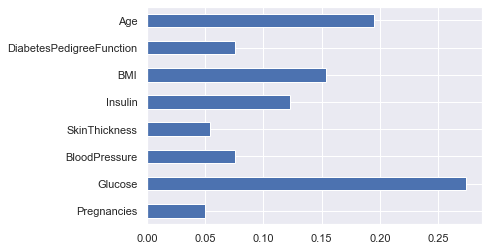

In [66]:
(pd.Series(GB_random_HT.feature_importances_, index=X.columns).plot(kind='barh'))

Here from the above graph, it is clearly visible that Glucose as a feature is the most important in this dataset.

# Saving Model – Random Forest

In [70]:
import pickle
filename = open("GB_random_HT_1.pkl","wb")
pickle.dump(GB_random_HT,filename)

# Conclusion

After using all these patient records, we are able to build a machine learning model (Gradient Boosting – best one) to accurately predict whether or not the patients in the dataset have diabetes or not along with that we were able to draw some insights from the data via data analysis and visualization.